In [3]:
import skimage.io as io

# Show the figures / plots inside the notebook
%matplotlib inline
from skimage.color import rgb2gray,rgb2hsv
import matplotlib.pyplot as plt
from skimage.util import random_noise
import numpy as np

from skimage.exposure import histogram
from matplotlib.pyplot import bar


In [4]:

def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images) # this is the number of images 
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)] # if there is no titles available
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

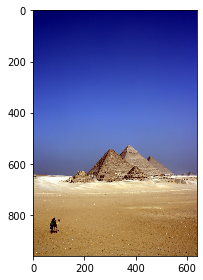

In [5]:
# Ex: imread and imshow 
pyramids = io.imread('pyramids.jpeg')
io.imshow(pyramids)
io.show()

In [6]:
# Use this function to show a histogram
# The image should be gray-scale and should range from 0 to 1
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')

[[[222 223 241]
  [222 223 241]
  [222 223 241]
  ...
  [204 205 226]
  [204 205 226]
  [204 205 226]]

 [[222 223 241]
  [222 223 241]
  [222 223 241]
  ...
  [204 205 226]
  [204 205 226]
  [204 205 226]]

 [[222 223 241]
  [222 223 241]
  [222 223 241]
  ...
  [204 205 226]
  [204 205 226]
  [204 205 226]]

 ...

 [[229 231 244]
  [229 231 244]
  [229 231 244]
  ...
  [228 230 243]
  [228 230 243]
  [228 230 243]]

 [[229 231 244]
  [229 231 244]
  [229 231 244]
  ...
  [228 230 243]
  [228 230 243]
  [228 230 243]]

 [[229 231 244]
  [229 231 244]
  [229 231 244]
  ...
  [228 230 243]
  [228 230 243]
  [228 230 243]]]


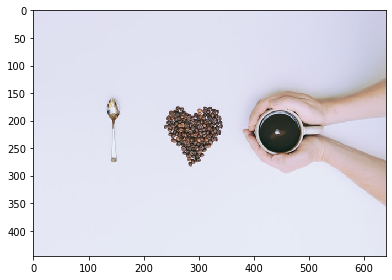

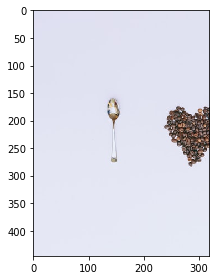

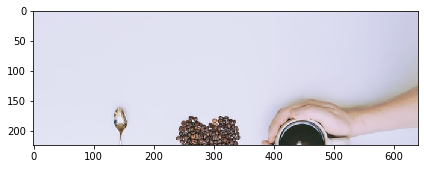

In [7]:
'''
@TODO:
Requirement #1 
-Read and print image 'coffee'  
-Show and print half of the  image
-----hint :use the attribute shape of numpy to get the image object dimentions
'''

#reading the image 
coffee = io.imread ('coffee.jpeg')
#printing the image 
print (coffee)
#showing the original coffee
io.imshow(coffee)
io.show()

#getting the image dimensions 
coffeeDiminsions = coffee.shape

# coping half of the data
halfCoffeeLeft = np.copy(coffee [0:446, 0:320])
#showing half of the img
io.imshow(halfCoffeeLeft)
io.show()

# coping half of the data
halfCoffeeUpper = np.copy(coffee [0:223, 0:640])
#showing half of the img
io.imshow(halfCoffeeUpper)
io.show()


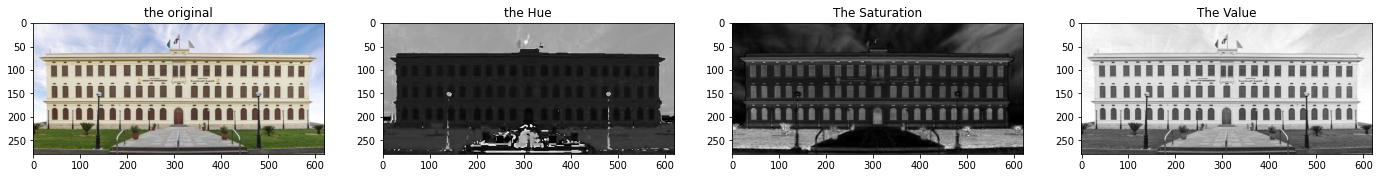

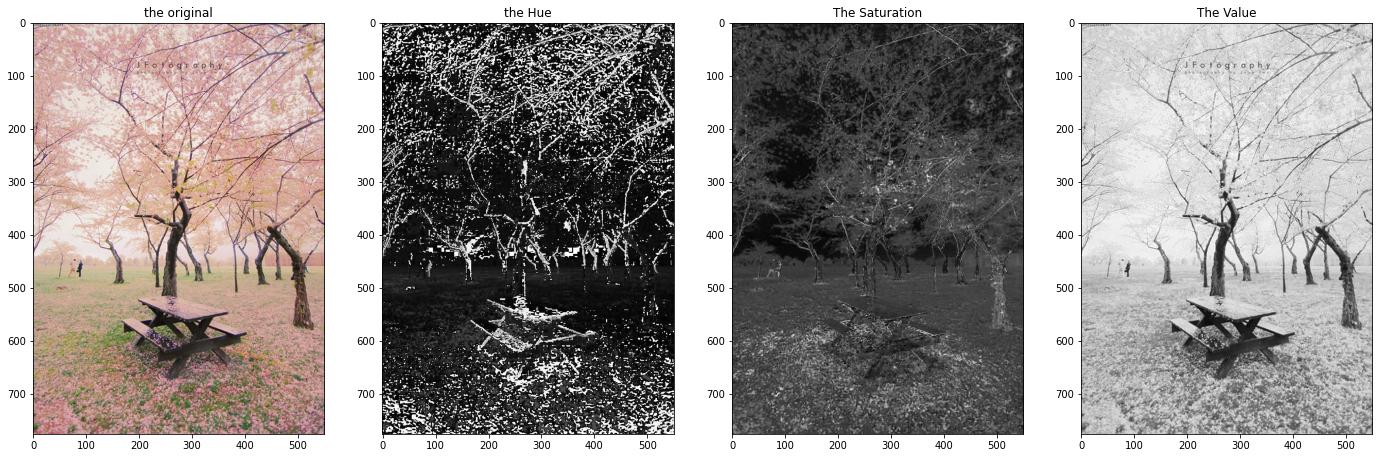

In [8]:
'''
@TODO:
Requirement #2 
RGB to gray and HSV:
1- Write a function 'gray_image' that takes an image as input , then
    -get the gray scale of the image, then
    -display original image and the gray scale one side by side (subplot).
    -hint: use rgb2gray to get the graylevel of the image
- test your function with the image 'pyramids'
    
2- Write a function 'HSV_image' that takes an image as input , then
   -show the RGB image and the (3 channels of HSV image each channel in separated form ) one side by side (subplot).
   -hint: -use rgb2hsv (to get the hsv representation of the image).
          -To separately get the Hue, Saturation and Value channels, use hsvImg[:,:,X], 
           where hsvImg is the hsv representation of the image. 
           Hue is the first channel, Saturation is the second and value is the last channel.
- test your function for the images in HSV Folder. And comment on the results. 
'''
# creating the function that takes the img and print it and its gray scale
def gray_image(img): 
    gray_scale = rgb2gray(img)
    show_images([img, gray_scale],['the original', 'the gray scale'])

def hsv_image (img):
    hsv_rep = rgb2hsv(img)
    channel1= hsv_rep[:,:,0]
    channel2= hsv_rep[:,:,1]
    channel3= hsv_rep[:,:,2]
    show_images([img, channel1, channel2, channel3],['the original', 'the Hue', 'The Saturation', 'The Value'] )

gray_image(pyramids)

p1 = io.imread('./hsv/ex1.jpg')
p2 = io.imread('./hsv/ex2.jpg')
p3 = io.imread('./hsv/ex3.jpg')

imgs= [p1,p2,p3] 

for i in range (3):
    hsv_image(imgs[i])

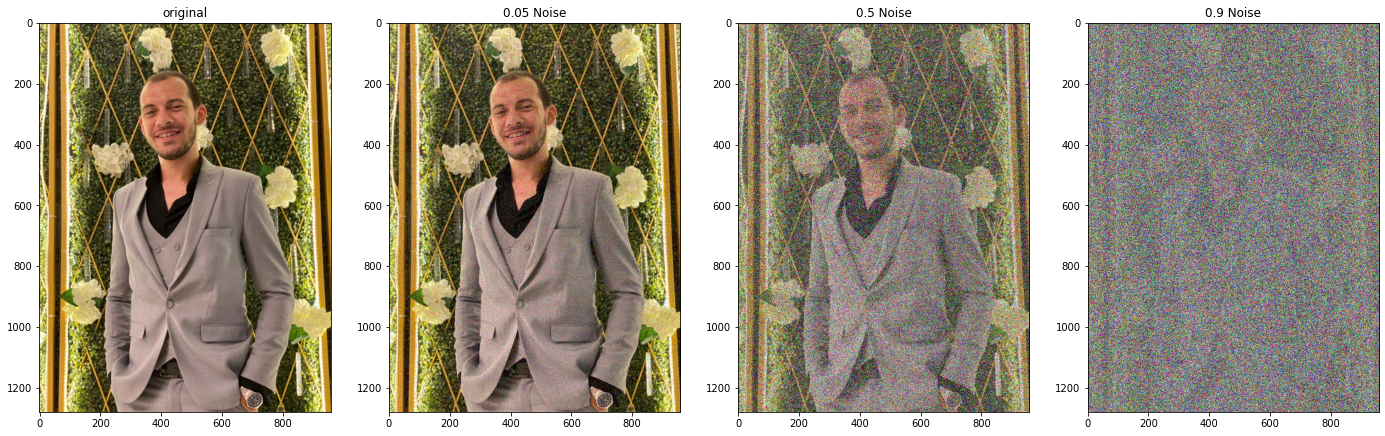

In [9]:
'''
Requirement 2 (Noise):
http://scikit-image.org/docs/dev/api/skimage.util.html#skimage.util.random_noise

1.For an image of your choice (the effect of noise must be obvious): 
    Read the image.
    Convert it to greyscale.
    Apply salt & pepper noise with 
    amount=0.05, 0.5 and 0.9
   
2. From the other images. Recommend one image that won’t be greatly affected by the noise and state why.    
    '''

# 1-
myPic = io.imread('./noiseImgs/LinkedInProfile.jpeg')
noise_img1 = random_noise(image= myPic, mode = 's&p',amount=0.05 )
noise_img2 = random_noise(image= myPic, mode = 's&p',amount=0.5 )
noise_img3 = random_noise(image= myPic, mode = 's&p',amount=0.9 )

show_images([myPic, noise_img1, noise_img2,noise_img3], ['original', '0.05 Noise', '0.5 Noise', '0.9 Noise'])


# 2- 
# i think this img his in the grey scale which consists of white and black scales so by applying more white and black noise the details may remain the same
p2 = io.imread('histogram\ex1.jpg')

noise_img1 = random_noise(image= p2, mode = 's&p',amount=0.05 )
noise_img2 = random_noise(image= p2, mode = 's&p',amount=0.5 )
noise_img3 = random_noise(image= p2, mode = 's&p',amount=0.9 )


show_images([p2, noise_img1, noise_img2,noise_img3], ['original', '0.05 Noise', '0.5 Noise', '0.9 Noise'])




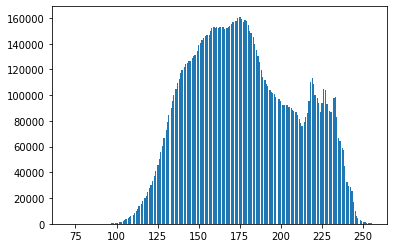

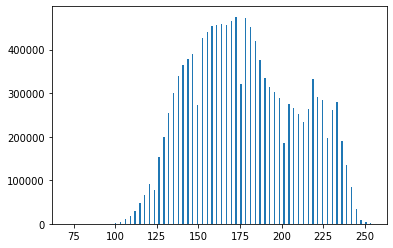

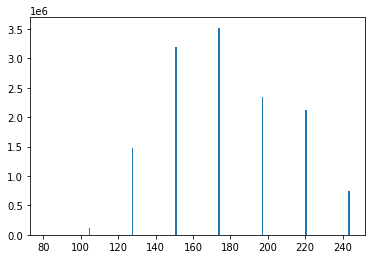

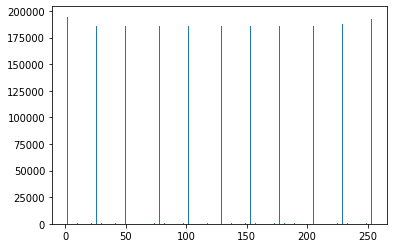

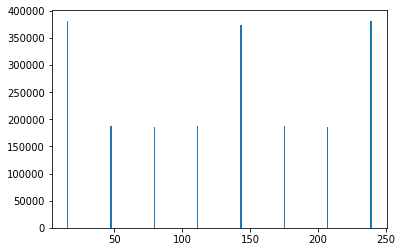

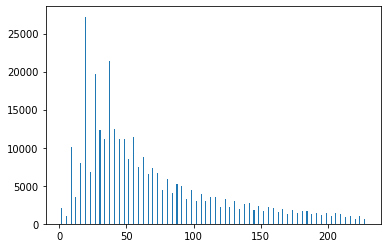

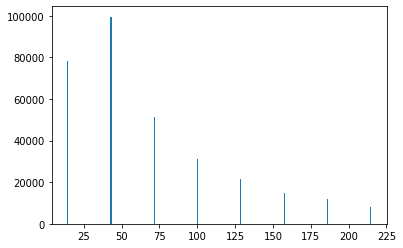

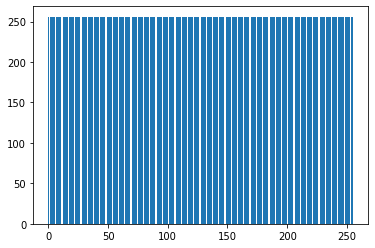

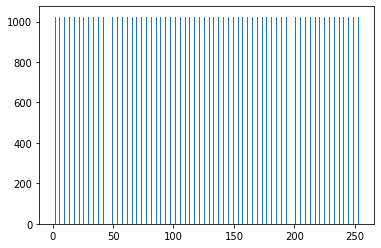

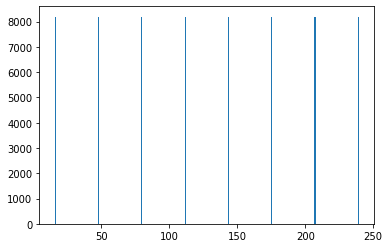

In [10]:
'''
Requirement 3 (Histogram):

1- For the given images (in histogram folder): 
    Read the image.
    Apply histogram and show it.
Hint
    A) Use histogram (image) to get histogram. Try different values for nbins (256,64,8), What does it mean?
    B) and function(showHist) to draw it.
** 2- Draw a grey-scale image that has uniform histogram 
same number of pixels for all intensity levels) using code only. Let the size of the image be 256x256.
use np.ones to draw image with ones.
'''


def MyHistogram(img):
    bins=[256,64,8]
    for bin in bins:
        HistogramImg=histogram(img,bin)
        showHist(img,HistogramImg)
    

example1=io.imread("histogram\ex1.jpg",as_gray=True)
MyHistogram(example1)

example2=io.imread("histogram\ex2.jpg",as_gray=True)
MyHistogram(example2)

example3=io.imread("histogram\ex3.jpg",as_gray=True)
MyHistogram(example3)

myimg=[]
for i in range(256):
    row =  np.linspace(0, 255, 256)
    myimg.append(row)
    
myimg=np.array(myimg)
myimg=myimg/255
MyHistogram(myimg)

# howa leh msh btshtghl m3 el png ?

In [3]:
import numpy as np
from skimage.feature import haar_like_feature_coord
from skimage.feature import draw_haar_like_feature
feature_coord, _ = haar_like_feature_coord(2, 2, 'type-4')
image = draw_haar_like_feature(np.zeros((2, 2)),
                                   0, 0, 2, 2,
                                    feature_coord,
                                    max_n_features=1)

print(image)
     

[[[0.  0.5 0. ]
  [0.5 0.  0. ]]

 [[0.5 0.  0. ]
  [0.  0.5 0. ]]]
